In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'C:\\Users\\Vinod Bhangare\\Downloads'

In [4]:
df=pd.read_csv('C:\\Users\\Vinod Bhangare\\Downloads\\Copy of imdb_data.csv')

In [5]:
df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [6]:
df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [7]:
#genres,crew,cast are in dictionary which is inside a list which is in string format. We have to evaluate it first.
#Let's create function for evaluating it.

def evaluate(string):
    return eval(string)

# 1. Create a list of unique genres.

In [8]:
#Now genres may contain null values therefore we have to eliminate it first.
#Let's create a new dataframe named genres in which we'll evaluate genres expelling the null values.

genres_df=df[~df['genres'].isna()]


In [9]:
#Now let's evaluate the genres
genres_df['genres']=genres_df['genres'].apply(evaluate)

<ipython-input-9-74fa6ece97af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genres_df['genres']=genres_df['genres'].apply(evaluate)


In [10]:
#Now gonna extract genres of every row in a list then gonna filter the unique ones with the help of set.
genres_list=[]
for index,row in genres_df.iterrows():
    for x in genres_df.loc[index,'genres']:
        genres_list.append(x['name'])
genres_list1=list(set(genres_list))
genres_list1

['Animation',
 'Comedy',
 'Adventure',
 'Science Fiction',
 'War',
 'Horror',
 'Western',
 'Family',
 'Foreign',
 'TV Movie',
 'Mystery',
 'Fantasy',
 'Action',
 'Crime',
 'Romance',
 'Music',
 'Drama',
 'Thriller',
 'Documentary',
 'History']

The genres count are:


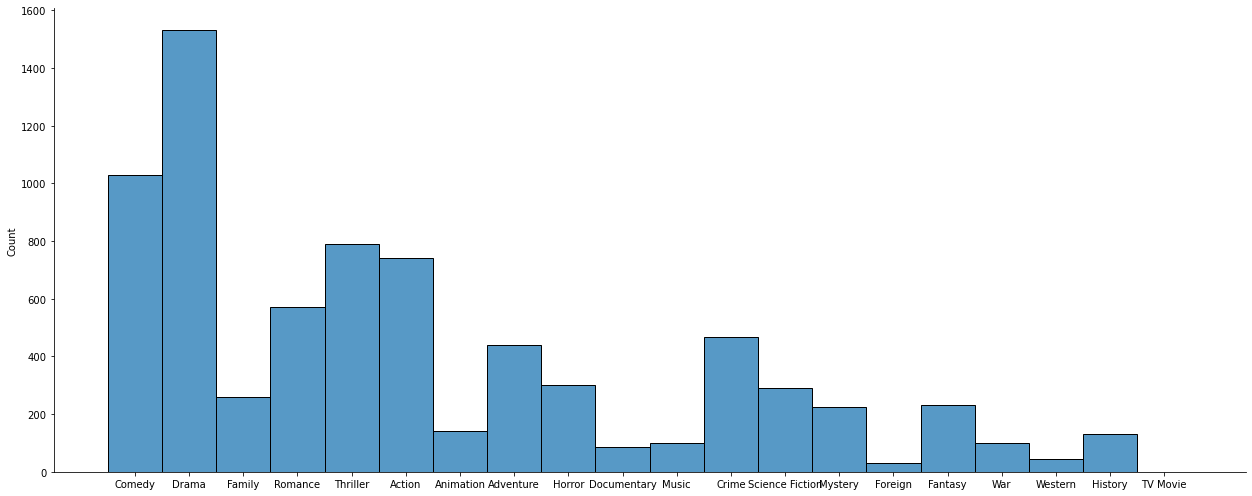

In [56]:
print("The genres count are:")
sns.displot(genres_list,height=7,aspect=2.5,)

In [57]:
print(f'Unique list of genres are :')
genres_list1

Unique list of genres are :


['Animation',
 'Comedy',
 'Adventure',
 'Science Fiction',
 'War',
 'Horror',
 'Western',
 'Family',
 'Foreign',
 'TV Movie',
 'Mystery',
 'Fantasy',
 'Action',
 'Crime',
 'Romance',
 'Music',
 'Drama',
 'Thriller',
 'Documentary',
 'History']

The pie chart of the genres:


([<matplotlib.patches.Wedge at 0x286379e91f0>,
 [Text(1.0864571742518743, 0.1720779140872905, 'Animation'),
  Text(0.980107173100488, 0.49938955659582074, 'Comedy'),
  Text(0.7778174502021366, 0.777817468408268, 'Adventure'),
  Text(0.4993895336547566, 0.9801071847895438, 'Science Fiction'),
  Text(0.17207788865692514, 1.0864571782796482, 'War'),
  Text(-0.17207793951765593, 1.0864571702240997, 'Horror'),
  Text(-0.4993895795368845, 0.9801071614114315, 'Western'),
  Text(-0.7778174866143992, 0.7778174319960044, 'Family'),
  Text(-0.9801071964785992, 0.499389510713692, 'Foreign'),
  Text(-1.0864571823074214, 0.1720778632265596, 'TV Movie'),
  Text(-1.0864571661963245, -0.1720779649480212, 'Mystery'),
  Text(-0.9801071497223744, -0.4993896024779483, 'Fantasy'),
  Text(-0.7778174137898723, -0.7778175048205297, 'Action'),
  Text(-0.49938948777262754, -0.980107208167654, 'Crime'),
  Text(-0.17207783779619373, -1.0864571863351944, 'Romance'),
  Text(0.17207799037838659, -1.0864571621685486, 

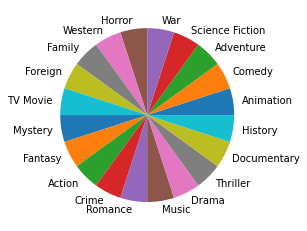

In [59]:
print("The pie chart of the genres:")
data=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
plt.pie(data,labels=genres_list1)

# 2. Top 5 actors who acted in most number of films?

In [60]:
#Gonna create new dataframe of cast without null values and gonna evaluate it first.
cast_df=df[~df['cast'].isna()]

In [61]:
cast_df['cast']=cast_df.loc[::,'cast'].apply(evaluate)

<ipython-input-61-d4337516fe8f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cast_df['cast']=cast_df.loc[::,'cast'].apply(evaluate)


In [62]:
#Now gonna put all actors of every row in a list named actors_list
actors_list=[]
for index,row in cast_df.iterrows():
    for x in cast_df.loc[index,'cast']:
        actors_list.append(x['name'])

In [63]:
#To find out which actor acted in how many films we'll create a data frame and gonna run value count.
actors_df=pd.DataFrame(actors_list,columns=['Actors'])

In [64]:
print('The top 5 actors which acted in most number of movies are :')
actors_df.value_counts()[0:5]

The top 5 actors which acted in most number of movies are :


Actors           
Samuel L. Jackson    30
Robert De Niro       30
Morgan Freeman       27
Liam Neeson          25
Susan Sarandon       25
dtype: int64

In [72]:
top_5_actors=pd.DataFrame(actors_df.value_counts()[0:5]).reset_index().rename(columns={0:'Movies'})

Barplot for the 5 actors with most number of movies:


<AxesSubplot:xlabel='Actors', ylabel='Movies'>

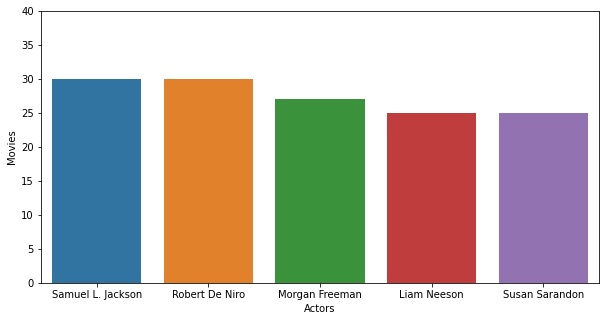

In [82]:
print('Barplot for the 5 actors with most number of movies:')
plt.figure(figsize=(10,5))
plt.ylim(0,40)
sns.barplot(x=top_5_actors['Actors'],y=top_5_actors['Movies'],data=top_5_actors)

# 3. Create columns of producer and director in the dataframe and the movie titles.

In [31]:
#Now gonna create a crew_df without null values to evaluate crew and to extract producers and directors.
crew_df=df[~df['crew'].isna()]

In [32]:
crew_df['crew']=np.vectorize(evaluate)(crew_df['crew'])

<ipython-input-32-8dd2004b5667>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crew_df['crew']=np.vectorize(evaluate)(crew_df['crew'])


In [33]:
def director_producer(row):
    director_list=[]
    producer_list=[]
    try:
        for x in row['crew']:
            if x['job']=='Director':
                director_list.append(x['name'])
            if x['job']=='Producer':
                producer_list.append(x['name'])
        row['Director']=director_list
        row['Producer']=producer_list
        return row
    except:
        return None

In [34]:
#let's check the function we created for creating director and producer columns
director_producer(crew_df.loc[0])

<ipython-input-33-564d2b0bdc41>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row['Director']=director_list
C:\Users\Vinod Bhangare\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
<ipython-input-33-564d2b0bdc41>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row['Producer']=producer_list


id                                                                       1
belongs_to_collection    [{'id': 313576, 'name': 'Hot Tub Time Machine ...
budget                                                            14000000
genres                                      [{'id': 35, 'name': 'Comedy'}]
homepage                                                               NaN
imdb_id                                                          tt2637294
original_language                                                       en
original_title                                      Hot Tub Time Machine 2
overview                 When Lou, who has become the "father of the In...
popularity                                                        6.575393
poster_path                               /tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg
production_companies     [{'name': 'Paramount Pictures', 'id': 4}, {'na...
production_countries     [{'iso_3166_1': 'US', 'name': 'United States o...
release_date             

In [35]:
#Let's update the crew_df by applying the director and producer function

In [36]:
crew_df=crew_df.apply(director_producer,axis=1)

In [37]:
crew_df['Director']

0            [Steve Pink]
1        [Garry Marshall]
2       [Damien Chazelle]
3           [Sujoy Ghosh]
4        [Jong-seok Yoon]
              ...        
2995      [Dennis Hopper]
2996    [Lukas Moodysson]
2997       [Renny Harlin]
2998       [John Hamburg]
2999     [John Singleton]
Name: Director, Length: 2984, dtype: object

In [38]:
crew_df['Producer']

0                                          [Andrew Panay]
1       [Whitney Houston, Mario Iscovich, Debra Martin...
2       [David Lancaster, Michel Litvak, Jason Blum, H...
3                                           [Sujoy Ghosh]
4                                                      []
                              ...                        
2995                                  [James G. Robinson]
2996                                      [Lars J√∂nsson]
2997    [Stephanie Austin, Shane Black, Renny Harlin, ...
2998        [Danny DeVito, Michael Shamberg, Stacey Sher]
2999    [Doug Davison, Roy Lee, Ellen Goldsmith-Vein, ...
Name: Producer, Length: 2984, dtype: object

In [39]:
#Lets create a dataframe for columns movie,director,producer
df_movie_director_producer=crew_df[['title','Director','Producer']].rename(columns={'title':'Movie'})

In [40]:
df_movie_director_producer

,Movie,Director,Producer
0,Hot Tub Time Machine 2,[Steve Pink],[Andrew Panay]
1,The Princess Diaries 2: Royal Engagement,[Garry Marshall],"[Whitney Houston, Mario Iscovich, Debra Martin..."
2,Whiplash,[Damien Chazelle],"[David Lancaster, Michel Litvak, Jason Blum, H..."
3,Kahaani,[Sujoy Ghosh],[Sujoy Ghosh]
4,Marine Boy,[Jong-seok Yoon],[]
...,...,...,...
2995,Chasers,[Dennis Hopper],[James G. Robinson]
2996,We Are the Best!,[Lukas Moodysson],[Lars J√∂nsson]
2997,The Long Kiss Goodnight,[Renny Harlin],"[Stephanie Austin, Shane Black, Renny Harlin, ..."
2998,Along Came Polly,[John Hamburg],"[Danny DeVito, Michael Shamberg, Stacey Sher]"


# 4. Producer and Director of the most profitable movie?

In [41]:
# Now we have to first change the budget and revenue which are less than 1000 to the median of revenue and budget of movies greater than 1000


In [42]:
df.loc[df['revenue']<1000,'revenue']=df.loc[df['revenue']>=1000,'revenue'].median()
df.loc[df['budget']<1000,'budget']=df.loc[df['budget']>=1000,'budget'].median()

In [43]:
# Now we will create a column of profit
df['profit']=df['revenue']-df['budget']

In [44]:
df['profit']

0        -1685349
1        55149435
2         9792000
3        14800000
4       -12526030
          ...    
2995    -14853313
2996    -16269410
2997     24456761
2998    129963386
2999     47087155
Name: profit, Length: 3000, dtype: int64

In [45]:
# Gonna find the most profitable movie by max function and then gonna find it's index to extract the producer and director
df['profit'].argmax()

1761

In [46]:
df.loc[~df['crew'].isna(),'crew']=df.loc[~df['crew'].isna(),'crew'].apply(evaluate)

In [47]:
profitable_movie_director=[]
profitable_movie_producer=[]
for x in df['crew'][df['profit'].argmax()]:
    if x['job']=='Director':
        profitable_movie_director.append(x['name'])
    if x['job']=='Producer':
        profitable_movie_producer.append(x['name'])

In [48]:
print(f'Director and Producer of the most profitable are :\nDirector- {profitable_movie_director}\nProducer-{profitable_movie_producer}')


Director and Producer of the most profitable are :
Director- ['James Wan']
Producer-['Vin Diesel', 'Neal H. Moritz', 'Michael Fottrell', 'Brandon Birtell']


# 5.Language of the movie with the max ROI?

In [49]:
#Calculate the max ROI
df['ROI']=100*df['profit']/df['budget']

In [50]:
df['ROI'].argmax()

1230

In [51]:
print(f"The language of the movie with max ROI is {df['original_language'][df['ROI'].argmax()]}")

The language of the movie with max ROI is en


# 6.Top 2 actors with most number of film's movie title and profit of those movies

In [52]:
# Actor with the number of films with the help of 2nd question
actors_df.value_counts()[0:2]

Actors           
Samuel L. Jackson    30
Robert De Niro       30
dtype: int64

In [53]:
cast_df['profit']=cast_df['revenue']-cast_df['budget']

<ipython-input-53-e46ec5b42a0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cast_df['profit']=cast_df['revenue']-cast_df['budget']


In [54]:
Sameul_jackson_1_movies=[]
Sameul_jackson_1_profit=[]
Robert_de_niro_2_movies=[]
Robert_de_niro_2_profit=[]

for index,row in cast_df.iterrows():
    for x in cast_df.loc[index,'cast']:
        if x['name']=='Samuel L. Jackson':
            Sameul_jackson_1_movies.append(cast_df.loc[index,'original_title'])
        if x['name']=='Samuel L. Jackson':
            Sameul_jackson_1_profit.append(cast_df.loc[index,'profit'])
        if x['name']=='Robert De Niro':
            Robert_de_niro_2_movies.append(cast_df.loc[index,'original_title'])
        if x['name']=='Robert De Niro':
            Robert_de_niro_2_profit.append(cast_df.loc[index,'profit'])
        


In [55]:
Sameul_jackson_1=pd.DataFrame(Sameul_jackson_1_profit,Sameul_jackson_1_movies).reset_index().rename(columns={'index':'Movies',0:'Profit'})
Robert_de_niro_2=pd.DataFrame(Robert_de_niro_2_profit,Robert_de_niro_2_movies).reset_index().rename(columns={'index':'Movies',0:'Profit'})

In [56]:
Sameul_jackson_1

,Movies,Profit
0,Changing Lanes,49935764
1,The Hateful Eight,111760117
2,Coming to America,249752301
3,Star Wars: Episode III - Revenge of the Sith,737000000
4,Meeting Evil,525
5,The Avengers,1299557910
6,Jumper,137231186
7,Shaft,61196498
8,Snakes on a Plane,29022014
9,The Man,12382362


In [57]:
Robert_de_niro_2

,Movies,Profit
0,This Boy’s Life,4104962
1,What Just Happened,-18326578
2,Mad Dog and Glory,11081586
3,The Good Shepherd,-25091435
4,Lenny Bruce: Swear to Tell the Truth,21350
5,Red Lights,-448826
6,Falling in Love,11129057
7,Wag the Dog,49256513
8,Meet the Parents,275444045
9,Marvin's Room,-10196695
